# Tendencias salariales para el mercado global de inteligencia artificial

## 01MIAR - Actividad Dataset
## Estudiante: Robinson Jair Ramirez Bustos
## Numero de documento: 1016100130

## Introduccion

Despiertas una mañana y tienes un dia agitado, la agenda laboral indica reuniones para casi toda la jornada y en la noche clase, de repente llega un correo a tu celular, una nueva vacante, las agencias de trabajo me hacen sentir que hay millones de oportunidades, cuando revisas en detalle, no cumples la oferta, hay un sin fin de herramientas que nombran, y en mi caso, es la primera vez que me relaciono con ellas, como siempre, la incertidumbre acechando por la cabeza, pero como yo, existen muchas personas por el mundo que continuan preparandose para aplicar conocimientos en el mercado laboral de la IA, sin embargo, con la velocidad con que avanzan las  en este campo, cuesta un poco entender a ciencia cierta en que especializarnos, por lo anterior se plantea la pregunta:

**¿Cuáles son las habilidades y roles emergentes que ofrecen mayor retorno económico en el mercado global de IA, y cómo ha evolucionado su demanda en el contexto de la adopción del trabajo por roles?** 

Para responder, tomaremos una base de datos de kaggle, con 15.000 registros, la cual lleva por titulo **[Global AI Job Market & Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)** donde encontramos informacion detallada sobre empleos en inteligencia artificial y machine learning, incluyendo salarios, roles y tendencias del mercado en distintos países, niveles de experiencia y tamaños de empresa.<br>


Vale la pena aclarar, el desarrollo de la actividad esta dentro de un marco academico y por tanto se tiene presente que el conjunto de datos es sintético, creado con fines educativos. La información fue generada algorítmicamente a partir de investigaciones de la industria y tendencias del mercado para simular patrones del mercado laboral en IA. <br>
 



## Desarollo

### Instalacion e importe de librerias

Se instala wordcloud, esta libreria que se utiliza para generar nubes de palabras a partir de texto, donde el tamaño de cada palabra representa su frecuencia o relevancia

In [1]:
pip install wordcloud 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Lectura y descripcion de la base de datos
Realizamos la lectura del archivo descargado de kaggle, haciendo referencia a ruta mediante la libreria os, que nos permite construir la ruta abosluta, basandose en el path de cada ordenador<br>
Luego usamos pandas para leer el archivo y almacenarlo en un DataFrame

In [3]:
ruta=os.path.join(os.getcwd(),'ai_job_dataset.csv')
df=pd.read_csv(ruta)
df.head(10) # Mostramos los 10 primeros registros del dataframe

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

Tenemos un total de 19 columnas, con la siguiente descripcion

* **`job_id`**: Identificador único de cada oferta de trabajo.
* **`job_title`**: Título estandarizado del puesto.
* **`salary_usd`**: Salario anual en dólares estadounidenses.
* **`salary_currency`**: Moneda original en la que fue expresado el salario.
* **`experience_level`**: Nivel de experiencia requerido para el puesto (Entry, Mid, Senior, Executive).
* **`employment_type`**: Tipo de contrato ofrecido (Full-time, Part-time, Contract, Freelance).
* **`company_location`**: País donde se encuentra la empresa que ofrece el empleo.
* **`company_size`**: Tamaño de la empresa según número de empleados (Small, Medium, Large).
* **`employee_residence`**: País de residencia del empleado.
* **`remote_ratio`**: Porcentaje de trabajo remoto permitido para el puesto (0%, 50%, 100%).
* **`required_skills`**: Lista de habilidades técnicas requeridas para el puesto (ej. Python, TensorFlow, PyTorch).
* **`education_required`**: Nivel mínimo de educación requerido (ej. Bachelor, Associate, Master, Doctorate).
* **`years_experience`**: Años de experiencia laboral requeridos.
* **`industry`**: Industria o sector de la empresa contratante (ej. Retail, Media, Healthcare).
* **`posting_date`**: Fecha en que se publicó la oferta laboral.
* **`application_deadline`**: Fecha límite para postularse al empleo.
* **`job_description_length`**: Longitud del texto de la descripción del puesto (número de caracteres).
* **`benefits_score`**: Puntaje que mide los beneficios ofrecidos por el empleo (en una escala de 5 a 10).
* **`company_name`**: Nombre de la empresa que publica la oferta.

Como se visualiza en el resultado de info, no existen valores nulos

In [5]:
pd.options.display.max_columns = 999 # setup para visualizar todas las columnas al tiempo

In [6]:
df.describe(include='all') # Se incluyen todas las columnas para ver el marco completo del dataset

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
count,15000,15000,15000.000000,15000,15000,15000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000
unique,15000,20,NaN,3,4,4,20,3,20,NaN,13663,4,NaN,15,486,543,NaN,NaN,16
top,AI00001,Machine Learning Researcher,NaN,USD,MI,FT,Germany,S,Sweden,NaN,"Python, TensorFlow, PyTorch",Bachelor,NaN,Retail,2024-07-05,2025-01-05,NaN,NaN,TechCorp Inc
freq,1,808,NaN,11957,3781,3812,814,5007,790,NaN,17,3789,NaN,1063,51,47,NaN,NaN,980
mean,NaN,NaN,115348.965133,NaN,NaN,NaN,NaN,NaN,NaN,49.483333,NaN,NaN,6.253200,NaN,NaN,NaN,1503.314733,7.504273,NaN
std,NaN,NaN,60260.940438,NaN,NaN,NaN,NaN,NaN,NaN,40.812712,NaN,NaN,5.545768,NaN,NaN,NaN,576.127083,1.450870,NaN
min,NaN,NaN,32519.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,500.000000,5.000000,NaN
25%,NaN,NaN,70179.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,1003.750000,6.200000,NaN
50%,NaN,NaN,99705.000000,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,5.000000,NaN,NaN,NaN,1512.000000,7.500000,NaN
75%,NaN,NaN,146408.500000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,10.000000,NaN,NaN,NaN,2000.000000,8.800000,NaN


In [7]:
df.describe() # solo columnas numericas

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


De momento las columnas no necesitan procesamiento alguno para llevar acabo los analisis, a excepcion que la columna "required_skills", la cual procesaremos en las siguiente seccion del documento

### Visualizacion de Datos
A continuacion se procede a realizar una grafica  que muestra la frecuencia de nuestra variable "salary_usd", como ya mencionamos, es el salario anual normalizado en dolares que devenga cada cargo

Text(0, 0.5, 'Frecuencia')

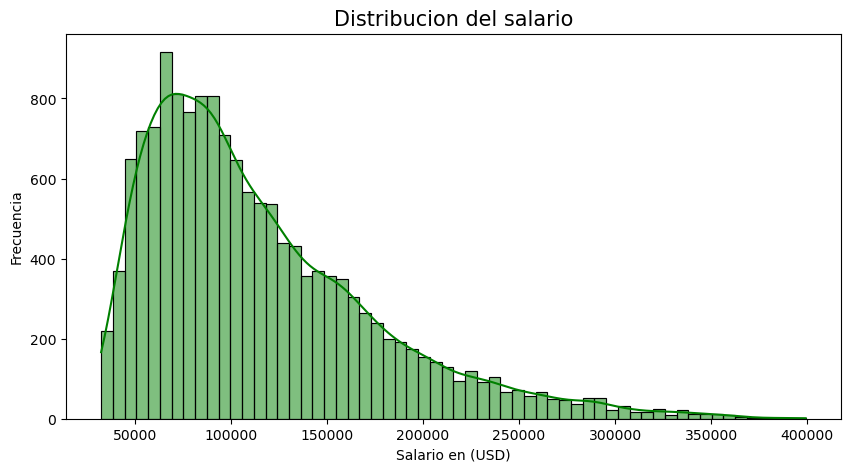

In [8]:
'''
Al ser este el primer grafico definieros los comentarios para cada linea de codigo y en celdas posteriores, 
quedaran sin comentarios, para no repetir informacion.
'''
plt.figure(figsize=(10,5)) # Defincion del tamaño del grafico
plt.title('Distribucion del salario',fontsize=15) # Titulo del grafico 
sns.histplot(df.salary_usd,kde=True, color= "Green", edgecolor= "black") # Usamos la libreria searbon para crear el grafico, tipo histgrama, definimos el color y delimitamos cada barra con un borde negro
plt.xlabel('Salario en (USD)') #Etiqueta eje x
plt.ylabel('Frecuencia') #Etiqueta eje y

La grafica muestra claramente que la mayoria de los salarios en trabajos relacionados con inteligencia artificial se concentran entre **50.000 y 120.000** dólares, y que hay muy pocos que ganan más de 200.000. Esto se nota porque la curva tiene una forma inclinada hacia la derecha, esto significa que hay algunos sueldos muy altos que suben el promedio, pero que en realidad no son tan comunes. En otras palabras, aunque hay personas ganando muchísimo dinero, lo más normal es que los sueldos estén en un rango medio, esto puede depender de variables como el país, el nivel de experiencia o el tipo de cargo. En general, la gráfica nos ayuda a ver cómo está distribuido el dinero en este campo y deja claro que no todos los trabajos de AI son millonarios, pero sí hay muchas oportunidades buenas.


Como mencionamos en el apartado anterior, el salario tiene multiples variables que podrian explicar con **precision su comportamiento**, par tanto, realizamos un grafico boxplot, en el cual vinculamos a la ecuacion, el nivel de experiencia (EN-Entry, MI- Mid, SE- Senior, Ex- Execute), ademas la variable categorica tamaño de la empresa que permite diferenciar por colores de acuerdo con sus abreviaciones S- Small, M-Medium y L-Large

Text(0, 0.5, 'Salario en (USD)')

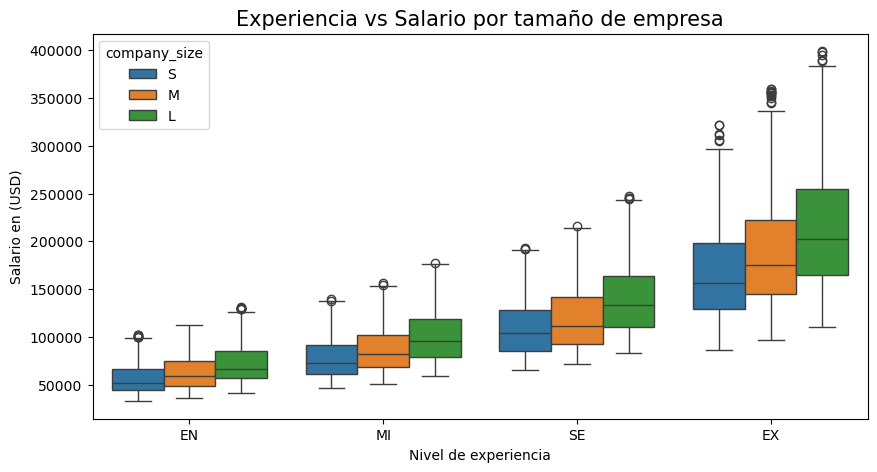

In [9]:
plt.figure(figsize=(10,5))
plt.title('Experiencia vs Salario por tamaño de empresa',fontsize=15)
sns.boxplot(data=df, x='experience_level', y='salary_usd',hue='company_size', order=['EN', 'MI', 'SE','EX'], hue_order=['S','M','L']) # Utilizamos order para asignar el orden cronologico de cada variable 
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en (USD)')


En la gráfica se nota algo que tiene mucho sentido, **a mayor experiencia, mayor salario**. Las cajas muestran cómo se reparte el salario en cada nivel de experiencia y se puede ver claramente que los rangos suben bastante con cada nivel, pero lo más interesante está en los colores, que muestran el tamaño de la empresa. Vemos que las empresas grandes > 250 empleados (verde), suelen pagar más que las medianas 50-250 (naranja) y estas más que las pequeñas < 50 (azul), sobre todo en niveles más altos de experiencia. O sea, si tiene experiencia y trabaja en una empresa grande, tiene muchas más posibilidades de tener un salario alto. En resumen, esta gráfica deja claro cómo el tamaño de la empresa y los niveles de experiencia van de la mano cuando hablamos de ganar más, sin embargo, en el dia a dia vemos que los roles por empresa es una medida bastante subjetiva, puesto que, una pequeña empresa que contiene una serie de estandares definidos para un rol en especifico,  considera senior a un miembro de su equipo, pero en una empresa grande considera que su nivel es mid, esto podria llevar a una reduccion de salario, para ello, utilizaremos una medida que podria complementar muy bien esta discusion y hablamos de los años de experiencia.


Text(0, 0.5, 'Salario en (USD)')

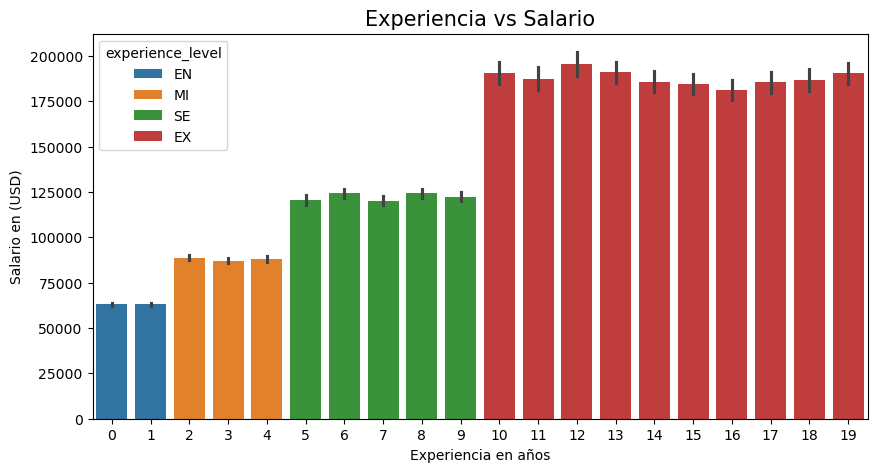

In [10]:
plt.figure(figsize=(10,5))
plt.title('Experiencia vs Salario',fontsize=15)
sns.barplot(data=df, x='years_experience', y='salary_usd',hue='experience_level')
plt.xlabel('Experiencia en años')
plt.ylabel('Salario en (USD)')

Como vemos, los años de experiencia nos dan un **marco cuantificable** para entender un poco mejor los niveles que mencionamos en la grafica anterior. En esta visual tambien podemos relacionar al comportamiento del salario, teniendo en cuenta que partimos del hecho: la mayor parte de los empleados ganan entre el rango de 50.000 a 120.000, este rango se puede asociar a empleados que tienen hasta **nueve años de experiencia laboral**, el comportamiento podria verse relacionado al mercado laboral en general. En una compañia la mayor parte del talento humano suele no estar especializado, con esto, se tiene **disminuciones de costos y alta operatividad**, esta afirmacion es generalizada y podria variar de acuerdo en el contexto de la industry en la que se observe, para poner un ejemplo, podemos hacer zoom sobre la industria de manufactura, con regularidad, tenemos que hay una linea jerarquica que aunmenta en la cantidad de personas tan pronto como nos alejamos de la cumbre de la jerarquia, asi pues, tendremos un gerente, dos especilistas, cuatro cordinadores de operacion y 30 operadores, en el mercado laboral de la IA tambien se produce este comportamiento, las personas de mayor experiencia ocupan cargos estrategicos, y tienen a cargo varias personas que articulan un equipo tecnologico en concreto, al tener mas cargos "operativos" tenemos mayor cantidad de personas y por tanto una mayor concentracion de salarios entre los rangos en cuestion. <br>

Una vez, indroduciomos a este analisis las industrias y sus diferentes comportamientos, vale la pena revisar cuales son las que mejor remuneraciones ofrecen a sus empleados

(112479.57497414685, 118102.14215686274)

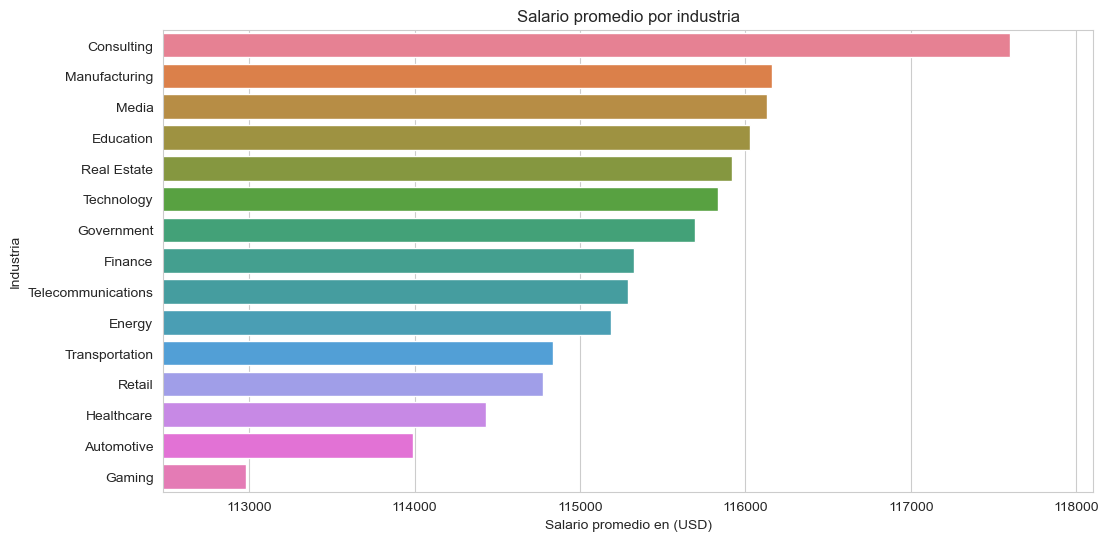

In [11]:
# Se realiza un agrupamiento de los datos para mostrar el salario anual en usd promedio por cada industria
industry_salary=df.groupby(by='industry')['salary_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x=industry_salary.values, y=industry_salary.index, hue=industry_salary.index)
plt.xlabel('Salario promedio en (USD)')
plt.ylabel('Industria')
plt.title('Salario promedio por industria')
plt.xlim(industry_salary.values.min()-500, industry_salary.values.max()+500)

Revisando en detalle la grafica anterior, se puede determinar que la industria de **consultoría** es la que mejor paga, y no es raro, porque ahí suelen pedir bastante experiencia y resolver problemas pesados para diferentes empresas. A esto tambien se le suma que no todas las empresas pueden disponer de un equipo de trabajo bien definido de base, para implementaciones sofisticadas se suele tercerizar a centros de consultoria especializados. También industrias como **manufactura**, **medios** y **educación** pagan bien, seguramente porque requieren conocimiento técnico o tienen que ver con formación e innovación.

Lo que sí sorprende un poco es que la industria de los **videojuegos (gaming)** es la que menos paga. Aunque se pensaría que es un sector muy top por su crecimiento, como contraejemplo de la premisa comun, se plantea la explicacion basandose en que podria haber muchos trabajos de esta industria que atraigan a gente joven, recién graduada o freelancers, esto genera sueldos que no pueden superar la media del mercado en su contexto de accion.


Para revisar en detalle los tipos de empleos que podrian ofrecer consultoria, se tiene en cuenta los empleos de Full-time - FT, Part-time -PT, Contract - CT o Freelance - FL

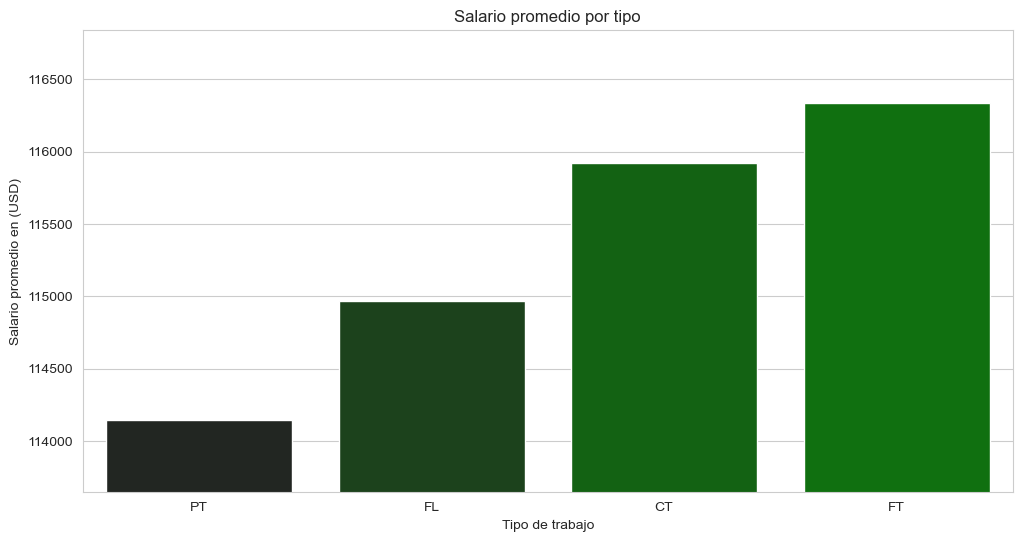

In [12]:
# Agrupamos por tipo de empleo
type_salary=df.groupby(by='employment_type')['salary_usd'].mean().sort_values(ascending=False) 

plt.figure(figsize=(12,6))
sns.barplot(x=type_salary.index, y=type_salary.values, hue=type_salary.values, order=['PT','FL','CT','FT'], palette='dark:green')
plt.xlabel('Tipo de trabajo')
plt.ylabel('Salario promedio en (USD)')
plt.title('Salario promedio por tipo')
plt.ylim(type_salary.min()-500, type_salary.max()+500)
plt.legend().remove()

El tipo de vinculacion laboral si bien muestra que las personas de tiempo completo pueden estar mejor remuneradas, seguidas por contratos y freelance, las **diferencias no son muy grandes** hablamos de cerca de dosmil dolares anuales, los datos sugieren que el tipo de vinculacion laboral puede llegar a ser una medida despreciable para el mercado laboral de IA.

En este punto, considero que se ha visto la relacion del salario con otras variables que puede explicar su comportamiento, ahora se realizara un importante analisis sobre los **skills** o requeridos, con el fin de visualizar de manera oportuna las principales herramientas y habilidades que se demanda en la actualidad.

Para ello, damos una vista rapida de lo que contien la columna "required_skills"

In [13]:
df['required_skills']

0               Tableau, PyTorch, Kubernetes, Linux, NLP
1        Deep Learning, AWS, Mathematics, Python, Docker
2           Kubernetes, Deep Learning, Java, Hadoop, NLP
3                              Scala, SQL, Linux, Python
4                           MLOps, Java, Tableau, Python
                              ...                       
14995                            Java, Kubernetes, Azure
14996            Mathematics, Docker, SQL, Deep Learning
14997                                  Scala, Spark, NLP
14998          Java, Computer Vision, Python, TensorFlow
14999      Scala, Azure, Deep Learning, GCP, Mathematics
Name: required_skills, Length: 15000, dtype: object

Para procesar las habilidades mas demandas, entonces realizamos un preprocesamiento a la columna required_skills.

Se evidencia que esta columna trae valores repetidos por cada celda, para visualizar por individual cuales son las habilidades mas repetidas, 
eliminamos los espacios en blanco, dividimos el contenido de cada celda por comas, y dividimos cada elemento por separado


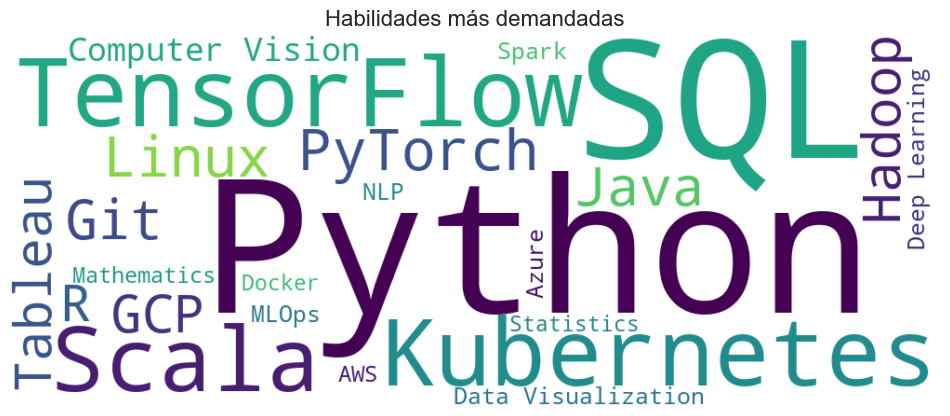

In [14]:
all_reqs = df["required_skills"].dropna().str.split(",").explode() # Division por elemento
all_reqs = all_reqs.str.strip() # eliminamos espacios en blanco al principio o al final 
req_counts = all_reqs.value_counts() #Conteo por elemento

# Se utiliza la libreria instalada para realizar la nube de palabras de acuerdo con su frecuencia
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(req_counts)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Habilidades más demandadas", fontsize=16)
plt.show()


Esta nube de palabras muestra las habilidades más demandadas en el mercado de trabajos relacionados con inteligencia artificial, a simple vista, se nota que lo más importante es saber **Python**, ya que aparece en grande, Le siguen herramientas como **TensorFlow**, **SQL** y **Kubernetes**, que también están bien destacadas, lo que indica que son bastante solicitadas.

También hay otras habilidades técnicas clave como **PyTorch**, **Linux**, **Docker**, **Java**, y plataformas como **AWS**, **GCP** y **Azure**, que tienen un peso medio. Además, hay áreas como **Deep Learning**, **Computer Vision** y **MLOps**, que, aunque están en letra más pequeña, son parte del combo de habilidades que se espera de alguien que trabaje en este campo. Si alguien quiere entrar al mundo de la IA, este gráfico deja claro que necesita dominar herramientas de programación, entornos de nube, y técnicas de machine learning, con un foco muy fuerte en Python y frameworks de deep learning.

Luego de tener en cuenta las principales habilidades que de destancan en el mercado de la IA, se procede a visualizar el contexto global por pais 

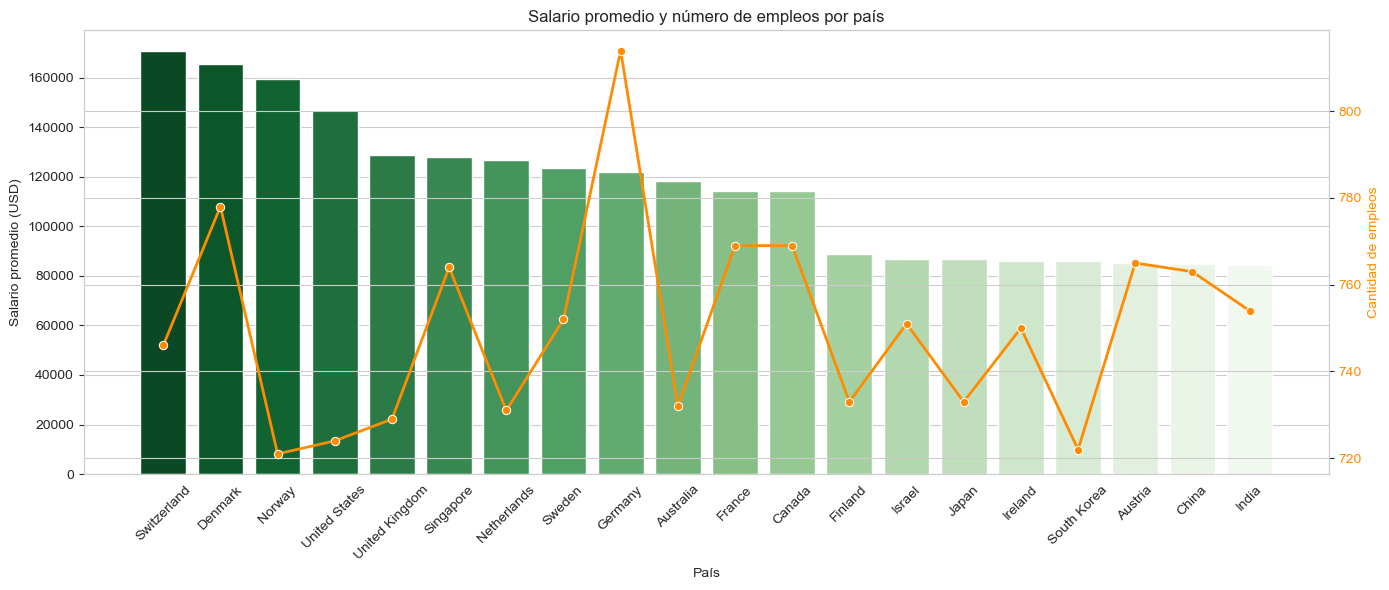

In [15]:
# Se realiza un agrupamiento de datos por locacion de la empresa y como medidas de agregacion se incluye el salario medio en dolares y el conteo de los empleos de cada pais
company_salary=df.groupby('company_location').agg(salary_mean=('salary_usd', 'mean'), count_jobs=('job_id','count')).sort_values(by='salary_mean',ascending=False).reset_index()

# Se uso un grafico combinado de barras y lineas el cual se configura de la siguiente forma
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras: salario promedio
sns.barplot(data=company_salary, x='company_location', y='salary_mean',hue='company_location', ax=ax1, palette='Greens_r')
ax1.set_ylabel('Salario promedio (USD)')
ax1.tick_params(axis='y')
ax1.set_xlabel('País')
ax1.set_title('Salario promedio y número de empleos por país')
plt.xticks(rotation=45)

# Líneas: cantidad de empleos (segundo eje Y)
ax2 = ax1.twinx()
sns.lineplot(data=company_salary,x='company_location',y='count_jobs',color='darkorange',marker='o',linewidth=2,ax=ax2)
ax2.set_ylabel('Cantidad de empleos', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.tight_layout()
plt.show()


Al observar la gráfica, se concluye que Europa lleva la delantera en el tema de empleos, **Alemania** por ejemplo, no solo ofrece buenos sueldos, sino que también tiene la mayor cantidad de vacantes. En cuanto a **salarios altos, suiza y dinamarca** son los que más pagan, superando incluso los 150,000 dólares en promedio, Asia también tiene una buena presencia, con muchos países representados, aunque los sueldos son más variados, Singapur e Israel son los que mejor pagan en esa región. Finalmente, Australia se mantiene en un punto medio, paga bien, pero no ofrece tantas oportunidades como Europa o Asia

A fin de comparar que preferencias tienen las empresas entre contratar equipo de trabajo en modalida 100% remoto, partiendo del supuesto que las columnas company_location, hace referencia al punto fisico de trabajo y por su parte employee_residence es el lugar de residencia del empleado.

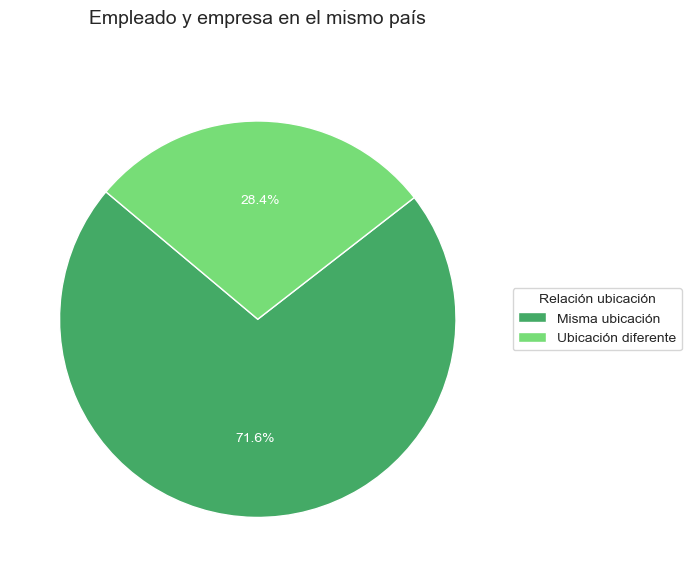

In [16]:

df['misma_ubicacion'] = df['company_location'] == df['employee_residence']# Crear una nueva columna para comparar por pais
conteo = df['misma_ubicacion'].value_counts() # Contar los valores
labels = ['Misma ubicación', 'Ubicación diferente']
values = [conteo[True], conteo[False]]
colors = ['#44aa66','#77dd77']
# Se utiliza la libreria directa de plt, dado que snsborn no cuenta con un grafico estilo pie
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    values,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="white")  # el porcentaje en blanco dentro del pastel
)

ax.legend(wedges, labels, title="Relación ubicación", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Empleado y empresa en el mismo país', y=1.08, fontsize=14)
plt.tight_layout()
plt.show()



El **71.6% de las empresas prefieren contratar empleados que esten en el mismo pais**, esto nos lleva a pesar que el entorno de la IA a pesar de funcionar muy bien en modelos hibridos de trabajo, aun existen preferencias por contratacion local, por lo anterior, determiar el porcentaje que existe entre la cantidad de empleos locales, versus la oferta internacional se vuelve un requisito fundamental para el entendimiento global del mercado en cuanto a ofertas se tratan, para esto, calculamos los paises que mayor contrataciones internacionales tienen.

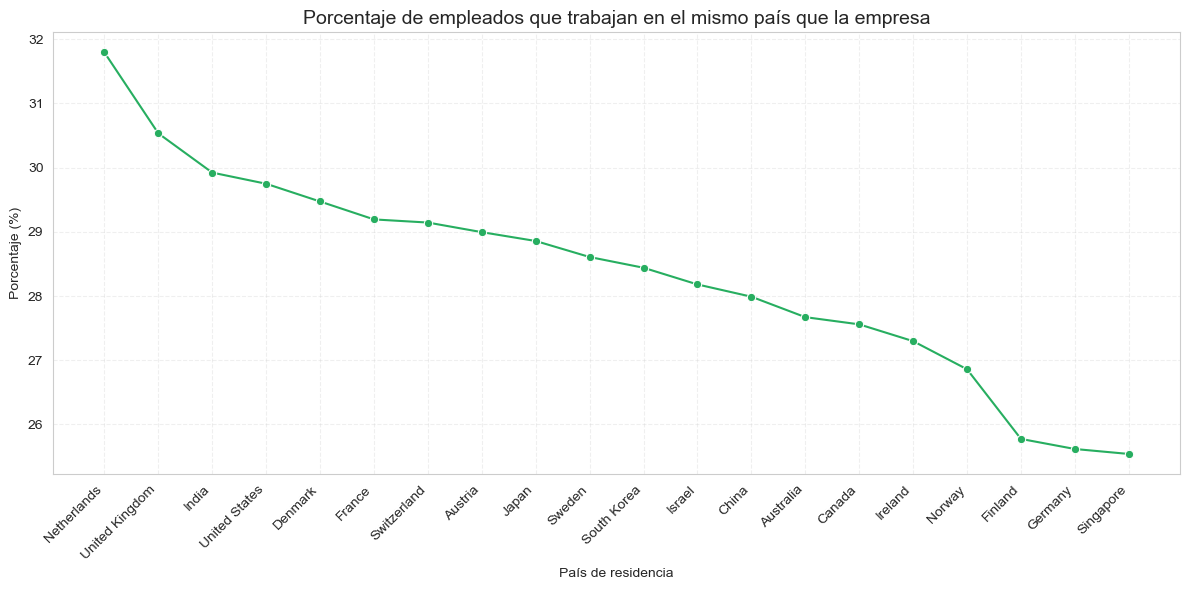

In [43]:
group = df.groupby(['employee_residence', 'misma_ubicacion']).size().unstack(fill_value=0) 
group['Total'] = grupo.sum(axis=1)
group['Porcentaje_misma_ubicacion'] = (grupo[False] / grupo['Total']) * 100 # Calcular porcentaje de empleados contratado a nivel internacional
group_lines = grupo[['Porcentaje_misma_ubicacion']].reset_index()
group_lines_o = group_lines.sort_values('Porcentaje_misma_ubicacion', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(data=group_lines_o, x='employee_residence', y='Porcentaje_misma_ubicacion', marker='o', sort='Porcentaje_misma_ubicacion', color='#27ae60')

plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de empleados que trabajan en el mismo país que la empresa', fontsize=14)
plt.xlabel('País de residencia')
plt.ylabel('Porcentaje (%)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



**Netherlands** es el cuarto pais que mas empleos genera dentro del top 10 de los paises que mejor retribucion economica ofrece, caracteristicas suficientes que atraen al mercado internacional de oferentes, este podria ser una razon por la cual ha contratado el **31.8%** de su capital humano en una locacion distinta a su lugar de operacion.  **Alemania por su parte**, al tener la mayor cantidad de empleos tiene una mayor oportunidad para contratar personas de todo el mundo, sin embargo, es muy probable que diversificar equipos de trabajo no le genera entornos productivos, aspecto que podria reflejar una premisa sobre los resultados, sueldos superiores para garantizar el bienestar integral del empleado local, atraccion de capital humano especializado.

Para redondear un poco mas la idea del mercado global, podemos inferir de la grafica anterior que la mayor parte de los paises tiene al rededor del 28% de su capital humano contratado internacionalmnete, cifras que no dejan muy bien posicionada una variable que incluiremos a continuacion.

El remote_ratio muesta por categorias la modalidad laboral utilizada por trabajo, adicional a esta variable debemos incluir otro aspecto que es significativo a la hora de escoger la modalidad laboral, puesto que no tendria sentido que un cirujano trabaje remoto, en el mercado de la IA se podria presentar tambien este tipo de casos especificos, por lo anterior, se considero  ¿Cuales cargos en el mercado tienen implicitos un factor necesario de presencialidad, para garantizar el mayor salario?

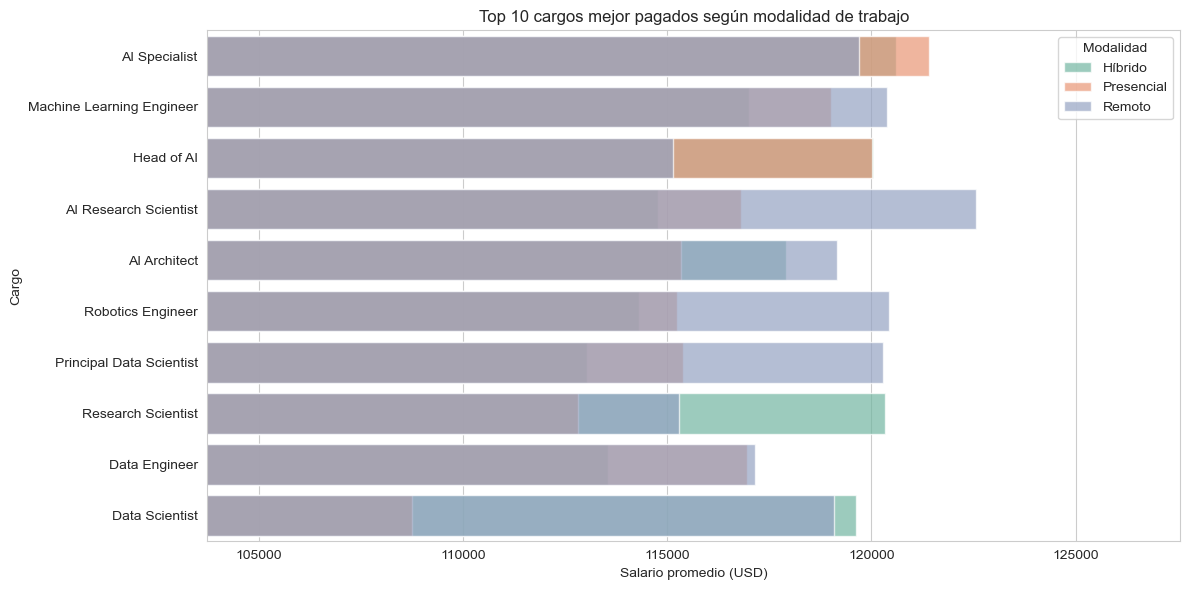

In [46]:
df['remote_label'] = df['remote_ratio'].map({0: 'Presencial', 50: 'Híbrido', 100: 'Remoto'}) # Mapeamos remote_ratio a etiquetas homologadas
mean_salaries = (df.groupby(['job_title', 'remote_label'], as_index=False)['salary_usd'].mean()) # Agrupar por job_title y remote_label, y calcular el salario promedio
top_10_titles = (mean_salaries.groupby('job_title')['salary_usd'].mean().nlargest(10).index)# Obtener el top 10 de cargos con mayor salario promedio (sin importar modalidad)
top_10_mean_salaries = mean_salaries[mean_salaries['job_title'].isin(top_10_titles)]
order = (top_10_mean_salaries.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).index)# Ordenar los títulos según el salario promedio

# Graficar con superposición (dodge=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_mean_salaries,
    x='salary_usd',
    y='job_title',
    hue='remote_label',
    palette='Set2',
    order=order,
    dodge=False,  # clave para superponer
    alpha=0.7     # para ver la superposición
)

plt.title('Top 10 cargos mejor pagados según modalidad de trabajo')
plt.xlabel('Salario promedio (USD)')
plt.ylabel('Cargo')
plt.xlim(top_10_mean_salaries['salary_usd'].min()-5000, top_10_mean_salaries['salary_usd'].max()+5000)
plt.legend(title='Modalidad')
plt.tight_layout()
plt.show()


Se evidencia que la mayoría de estos roles pueden desempeñarse de forma remota, lo cual se refleja en la amplia presencia del color azul (remoto) a lo largo de las barras. Sin embargo, también se observa que en algunos casos, como el cargo de **Head of AI** o **Research Scientist**, los trabajos presenciales tienden a ofrecer salarios ligeramente más altos. Esto sugiere que, aunque la tendencia del sector apunta hacia la flexibilidad y el trabajo remoto, ciertos roles cuya naturaleza exige presencia física o toma de decisiones estratégicas en sitio, siguen siendo más valorados económicamente.


### Discusion y conclusiones 

- El mercado global de la inteligencia artificial presenta una clara tendencia hacia la especializacion tecnica, donde el retorno economico esta fuertemente asociado a la experiencia acumulada, el dominio de herramientas clave y la insercion en sectores estrategicos como la consultoria, manufactura o educacion. El salario en IA, aunque puede alcanzar cifras elevadas, se concentra principalmente entre los 50.000 y 120.000 USD anuales, con un sesgo hacia la derecha debido a unos pocos cargos con remuneraciones excepcionalmente altas.

- Desde la dimension de los roles emergentes, se identifican cargos como Research Scientist, AI Architect, NLP Engineer o Principal Data Scientist entre los mejor remunerados, en gran medida por su capacidad de decision estrategica y su involucramiento en fases criticas del ciclo de vida de proyectos de IA. Estos cargos, si bien pueden ejecutarse de forma remota, muestran en algunos casos una mayor retribucion cuando se desempeñan de forma presencial, lo que evidencia que la presencia fisica sigue siendo valorada en funciones de alta responsabilidad o que exigen colaboracion directa.

- En cuanto a las habilidades tecnicas mas demandadas, destaca de forma contundente el dominio de Python, seguido de frameworks como TensorFlow y PyTorch, asi como competencias en Kubernetes, SQL y plataformas cloud (AWS, GCP, Azure). Este conjunto forma el núcleo de lo que actualmente se considera el perfil tecnico ideal para roles en IA, lo que indica que la preparacion tecnica sigue siendo el principal habilitador para acceder a oportunidades de alto rendimiento economico.

- Por otro lado, variables como el tipo de contratacion (full-time, freelance, contract) tienen un impacto marginal en el salario promedio, lo que sugiere que el mercado valora mas el perfil tecnico y la experiencia que el modelo de vinculacion en si mismo. En cambio, el tamaño de la empresa si resulta ser un factor diferenciador: las grandes organizaciones ofrecen mejores salarios, especialmente a niveles senior y ejecutivo, consolidando la idea de que el ecosistema corporativo mas robusto esta dispuesto a pagar mas por talento especializado.

- Desde el enfoque geografico, Europa y Asia lideran la oferta laboral en IA, con paises como Alemania, Suiza, Paises Bajos e Israel destacandose por su equilibrio entre cantidad de vacantes y salario promedio. No obstante, se mantiene una preferencia por la contratacion local, con un 71.6% de las vacantes cubiertas por residentes del mismo pais de la empresa, lo cual limita —aunque no excluye— la internacionalizacion del talento.

Finalmente, en el marco de la evolucion del trabajo por roles, se aprecia una transicion sostenida hacia el trabajo remoto, especialmente en roles operativos o tecnicos que permiten independencia geografica. Sin embargo, los puestos que involucran liderazgo, toma de decisiones o alta confidencialidad, tienden a preservar su modalidad presencial, como reflejo de su impacto organizacional y estrategico.


En sintesis, el mayor retorno economico en el mercado global de IA se encuentra en la conjuncion de tres elementos: altos niveles de experiencia, dominio de habilidades tecnicas especificas y vinculacion a sectores estrategicos o grandes organizaciones. Aunque el entorno laboral tiende hacia la descentralizacion geografica, el trabajo por roles todavia conserva una segmentacion funcional, en la que la presencialidad sigue siendo sinonimo de valor para determinadas posiciones. Adaptarse a este ecosistema requiere una preparacion tecnica solida, vision de largo plazo y flexibilidad para operar en contextos hibridos, tanto en terminos de modalidad como de competencias profesionales.